In [2]:
print("hello world")

hello world


In [3]:
# basics
import pandas as pd 
import numpy as np
import os 
import re
from datetime import datetime
from tqdm.notebook import tqdm
tqdm.pandas()
import requests
import urllib

# plotting
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# local or gdrive
path_source = 'local2'

if path_source == 'gdrive':
  # from google.colab import drive
  # drive.mount('/content/gdrive')
  data_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  data_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

elif path_source == 'local2':
  data_path = '/data/modeling_data'
  #env_path = '/content/gdrive/MyDrive/.env'

In [5]:
  
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
   
current_path()
   
os.chdir('../')
   
current_path()

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project\modeling

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project



In [6]:
os.getcwd()

'c:\\Users\\anandadmin\\Documents\\ML_MS\\UCB\\2022_Fall\\W210\\JLPS_capstone_project'

In [7]:
# load full dataset
df = pd.read_csv('data\modeling_data\modeling_data_2022-10-16.csv')

In [8]:
df.head()

,year_month,school_zip,school_county_v2,school_region_name,pm25,school_elevation_m,ps_elevation_m,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,total_population,total_population_male,total_population_female,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wspd_merge,school_wdir_wrt_0n,ps_wdir_wrt_0n,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,nearby_point_source_count,school_wspd,ca_agi_per_returns,total_tax_liability,tax_liability_per_capita,school_temperature,ps_temperature,school_count,pm25_last_month,pm25_r6,pm25_r9,pm25_r12,pm25_r24,pm25_slope6,pm25_slope9,pm25_slope12,pm25_slope24,pm25_lag_12mo,year,month,school_region_name_central_coast,school_region_name_inland_empire,school_region_name_los_angeles_county,school_region_name_north_coast,school_region_name_northern_san_joaquin_valley,school_region_name_orange_county,school_region_name_san_diego_-_imperial,school_region_name_san_francisco_bay_area,school_region_name_southern_san_joaquin_valley,school_region_name_superior_california,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,2000-01-01,90001,Los Angeles,Los Angeles County,32.149998,44.728889,43.703333,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,23505.0,12055.0,11450.0,54481.0,27320.0,27161.0,14.241154,3854.812685,-90.196586,0.757031,-172.758321,-172.758321,82.561735,82.561735,0.757031,82.561735,1.124995,0.000000,0.757031,20049.704556,2608176.0,47.873130,14.277778,14.266667,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2000-01-01,90002,Los Angeles,Los Angeles County,31.849998,33.858889,29.690000,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,19843.0,10062.0,9781.0,44584.0,21553.0,23031.0,6.649500,2734.278190,-75.730039,0.757031,-172.758321,-172.758321,97.028283,97.028283,0.757031,97.028283,0.879819,0.222222,0.757031,19697.001063,1549733.0,34.759847,14.300000,14.400000,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2000-01-01,90003,Los Angeles,Los Angeles County,31.724998,42.329167,45.785000,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,24796.0,12563.0,12233.0,58187.0,28557.0,29630.0,11.672797,5281.522927,-63.495073,0.855611,-172.758321,-60.057878,106.478652,100.850655,0.806321,103.664653,0.869845,0.000000,0.757031,18895.491452,2255523.0,38.763349,14.300000,14.383333,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2000-01-01,90004,Los Angeles,Los Angeles County,29.560000,83.190000,102.906667,5621.0,2879.0,2742.0,5505.0,2816.0,2689.0,4470.0,2297.0,2173.0,4204.0,2199.0,2005.0,19800.0,10191.0,9609.0,67850.0,34200.0,33650.0,5.158316,6452.615217,-87.100171,0.757031,-172.758321,-172.758321,78.897449,78.897449,0.757031,78.897449,1.160977,0.000000,0.757031,41990.032278,44046571.0,649.175696,14.022222,13.911111,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-01-01,90006,Los Angeles,Los Angeles County,30.750000,65.920000,77.570000,5939.0,3050.0,2889.0,6009.0,2995.0,3014.0,4493.0,2337.0,2156.0,4416.0,2370.0,2046.0,20857.0,10752.0,10105.0,62765.0,31901.0,30864.0,3.553121,5187.184865,-78.360123,0.757031,-172.758321,-172.758321,94.398199,94.398199,0.757031,94.398199,0.923498,0.000000,0.757031,17629.297337,3132557.0,49.909297,14.140000,14.100000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
       'pm25', 'school_elevation_m', 'ps_elevation_m', 'population_0_4',
       'population_0_4_male', 'population_0_4_female', 'population_5_9',
       'population_5_9_male', 'population_5_9_female', 'population_10_14',
       'population_10_14_male', 'population_10_14_female', 'population_15_19',
       'population_15_19_male', 'population_15_19_female', 'total_pop_under19',
       'pop_under19_male', 'pop_under19_female', 'total_population',
       'total_population_male', 'total_population_female',
       'point_source_pm25_tpy', 'dist_school_to_ps_m', 'angle_to_school',
       'ps_wspd_merge', 'school_wdir_wrt_0n', 'ps_wdir_wrt_0n',
       'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed',
       'avg_wind_alignment', 'avg_wind_alignment_cosine',
       'nearby_point_source_count', 'school_wspd', 'ca_agi_per_returns',
       'total_tax_liability', 'tax_liability_per_capita', 'school_temperatu

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312345 entries, 0 to 312344
Data columns (total 78 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   year_month                                      312345 non-null  object 
 1   school_zip                                      312345 non-null  int64  
 2   school_county_v2                                312345 non-null  object 
 3   school_region_name                              312345 non-null  object 
 4   pm25                                            312345 non-null  float64
 5   school_elevation_m                              312345 non-null  float64
 6   ps_elevation_m                                  312345 non-null  float64
 7   population_0_4                                  312345 non-null  float64
 8   population_0_4_male                             312345 non-null  float64
 9   population_0_4_female     

In [11]:
temp = df.isna().sum()

In [12]:
display(temp.sort_values(ascending=False))

pm25_r24                                          33312
pm25_slope24                                      33312
pm25_lag_12mo                                     16656
pm25_slope12                                      16656
pm25_r12                                          16656
pm25_r9                                           12492
pm25_slope9                                       12492
pm25_slope6                                        8328
pm25_r6                                            8328
pm25_last_month                                    1388
tax_liability_per_capita                             24
school_region_name_los_angeles_county                 0
school_count                                          0
ps_temperature                                        0
school_temperature                                    0
year                                                  0
month                                                 0
school_region_name_central_coast                

# Data Clean

In [13]:
# Make treatment var normally distributed by taking log(1+x)
df['pm25_log'] = np.log1p(df['pm25'])

In [59]:
# add in transformed input variables

# pow 2
df['avg_wind_alignment_cosine_pow2']  = df['avg_wind_alignment_cosine']**2

# pow 4
df['avg_wind_alignment_cosine_pow4']  = df['avg_wind_alignment_cosine']**4

# div 2
df['avg_wind_alignment_cosine_div2']  = df['avg_wind_alignment_cosine']/2

# div 2, pow 2
df['avg_wind_alignment_cosine_div2_pow2']  = (df['avg_wind_alignment_cosine']/2)**2

# div 2, pow 4
df['avg_wind_alignment_cosine_div2_pow4']  = (df['avg_wind_alignment_cosine']/2)**4

# div 2, pow 5
df['avg_wind_alignment_cosine_div2_pow5']  = (df['avg_wind_alignment_cosine']/2)**5

# div 2, pow 6
df['avg_wind_alignment_cosine_div2_pow6']  = (df['avg_wind_alignment_cosine']/2)**6

In [60]:
df[['avg_wind_alignment', 'avg_wind_alignment_cosine', 'avg_wind_alignment_cosine_pow2', 'avg_wind_alignment_cosine_pow4', 'avg_wind_alignment_cosine_div2', 'avg_wind_alignment_cosine_div2_pow2', 'avg_wind_alignment_cosine_div2_pow4', 'avg_wind_alignment_cosine_div2_pow5', 'avg_wind_alignment_cosine_div2_pow6']].head(10)

,avg_wind_alignment,avg_wind_alignment_cosine,avg_wind_alignment_cosine_pow2,avg_wind_alignment_cosine_pow4,avg_wind_alignment_cosine_div2,avg_wind_alignment_cosine_div2_pow2,avg_wind_alignment_cosine_div2_pow4,avg_wind_alignment_cosine_div2_pow5,avg_wind_alignment_cosine_div2_pow6
0,82.561735,1.124995,1.265614,1.601778,0.562497,0.316403,0.100111,0.056312,0.031676
1,97.028283,0.879819,0.774081,0.599202,0.439909,0.193520,0.037450,0.016475,0.007247
2,103.664653,0.869845,0.756630,0.572489,0.434922,0.189158,0.035781,0.015562,0.006768
3,78.897449,1.160977,1.347869,1.816750,0.580489,0.336967,0.113547,0.065913,0.038262
4,94.398199,0.923498,0.852848,0.727350,0.461749,0.213212,0.045459,0.020991,0.009692
5,66.380028,1.394518,1.944680,3.781779,0.697259,0.486170,0.236361,0.164805,0.114912
6,91.664393,0.971044,0.942926,0.889110,0.485522,0.235732,0.055569,0.026980,0.013099
7,41.142168,1.627893,2.650037,7.022694,0.813947,0.662509,0.438918,0.357256,0.290787
8,93.212934,0.963862,0.929030,0.863096,0.481931,0.232257,0.053944,0.025997,0.012529
9,70.395660,1.312277,1.722071,2.965527,0.656138,0.430518,0.185345,0.121612,0.079794


In [16]:
# fixing month datatype
df['month'] = df['month'].astype(str)

### Define all vars we will be using

In [86]:
# X vars
#x_wind = ['school_wspd', 'ps_wspd_merge', 'avg_wind_speed']
x_wind = ['school_wspd', 'ps_wspd_merge']
x_elevation = ['school_elevation_m', 'ps_elevation_m']
x_population = [i for i in df.columns if (re.search('population_', i) and re.search('male', i))] # + ['pop_under19_male', 'pop_under19_female']
x_population_tree = [i for i in df.columns if (re.search('population', i) or re.search('pop', i))] 
x_socioecon = ['ca_agi_per_returns'] # + ['tax_liability_per_capita']
x_temp = ['school_temperature', 'ps_temperature']
# x_window = ['pm25_last_month'] + [i for i in df.columns if re.search('pm25_r.', i)] + [i for i in df.columns if re.search('pm25_slope', i)] + ['pm25_lag_12mo']
x_window = ['pm25_last_month'] + [i for i in df.columns if re.search('pm25_r.', i)] + ['pm25_lag_12mo']

x_other = ['nearby_point_source_count', 'school_count', 'point_source_pm25_tpy']
x_time = ['year'] + [i for i in df.columns if (re.search('month_', i) and i not in 'month_01')]
x_region = [i for i in df.columns if (re.search('school_region_name_', i) and i not in 'school_region_name_los_angeles_county')]
# vars I dont think we can use:
#point_source_pm25_tpy
x_all = x_wind + x_elevation + x_population + x_socioecon + x_temp + x_window + x_other + x_time + x_region
x_vars_for_tree_model = x_wind + x_elevation + x_population_tree + x_socioecon + x_temp + x_window + x_other + ['year', 'month', 'school_region_name']

other_vars_to_keep = ['month_01', 'school_region_name_los_angeles_county', 'month', 'school_region_name'] +['total_pop_under19']

instrument = ['avg_wind_alignment', 'avg_wind_alignment_cosine', 
                'avg_wind_alignment_cosine_pow2', 'avg_wind_alignment_cosine_pow4', 
                'avg_wind_alignment_cosine_div2', 'avg_wind_alignment_cosine_div2_pow2', 'avg_wind_alignment_cosine_div2_pow4', 'avg_wind_alignment_cosine_div2_pow5', 'avg_wind_alignment_cosine_div2_pow6']

y_pm25_log = ['pm25_log']
y_pm25 = ['pm25']

# y_hema = ['y_hematopoietic']
# y_vasc = ['y_vasculitis']
# y_diab = ['y_diabetes']

all_vars_to_keep = list(set(x_all + other_vars_to_keep + instrument + y_pm25_log + y_pm25))
all_vars_to_keep_tree = list(set(x_vars_for_tree_model + other_vars_to_keep + instrument + y_pm25_log + y_pm25))

In [87]:
x_population

['population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female']

In [88]:
x_population_tree

['population_0_4',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19',
 'population_15_19_male',
 'population_15_19_female',
 'total_pop_under19',
 'pop_under19_male',
 'pop_under19_female',
 'total_population',
 'total_population_male',
 'total_population_female']

Select only necessary columns, and remove all NA values

In [89]:
# get complete data
print(f'num rows to start: {df.shape[0]}')

df_modeling_lr = df[all_vars_to_keep]

for var in df_modeling_lr.columns:
  df_modeling_lr = df_modeling_lr[~df_modeling_lr[var].isna()]

print(f'num rows after filtering: {df_modeling_lr.shape[0]}')

num rows to start: 312345
num rows after filtering: 279033


In [90]:
df_modeling_lr.isna().sum()

avg_wind_alignment_cosine_div2_pow2               0
total_population_male                             0
pm25_r12                                          0
month_07                                          0
month_11                                          0
school_region_name                                0
month                                             0
school_region_name_northern_san_joaquin_valley    0
pm25_r6                                           0
population_10_14_female                           0
school_region_name_superior_california            0
avg_wind_alignment_cosine_pow2                    0
avg_wind_alignment_cosine_div2_pow5               0
school_elevation_m                                0
pm25_last_month                                   0
population_0_4_male                               0
month_02                                          0
pm25_lag_12mo                                     0
school_temperature                                0
school_wspd 

In [91]:
df_modeling_lr.describe()

,avg_wind_alignment_cosine_div2_pow2,total_population_male,pm25_r12,month_07,month_11,school_region_name_northern_san_joaquin_valley,pm25_r6,population_10_14_female,school_region_name_superior_california,avg_wind_alignment_cosine_pow2,avg_wind_alignment_cosine_div2_pow5,school_elevation_m,pm25_last_month,population_0_4_male,month_02,pm25_lag_12mo,school_temperature,school_wspd,total_population_female,avg_wind_alignment_cosine_div2_pow6,ps_temperature,avg_wind_alignment_cosine,pm25_log,school_region_name_los_angeles_county,population_5_9_female,month_01,avg_wind_alignment_cosine_pow4,population_0_4_female,ps_elevation_m,year,point_source_pm25_tpy,month_12,school_region_name_north_coast,population_15_19_male,month_09,month_04,school_region_name_inland_empire,school_region_name_orange_county,population_15_19_female,month_03,month_05,school_region_name_san_diego_-_imperial,school_region_name_san_francisco_bay_area,school_region_name_southern_san_joaquin_valley,total_pop_under19,nearby_point_source_count,ps_wspd_merge,month_06,month_08,avg_wind_alignment_cosine_div2,ca_agi_per_returns,avg_wind_alignment_cosine_div2_pow4,pm25,pm25_r24,pm25_r9,population_10_14_male,population_5_9_male,avg_wind_alignment,month_10,school_region_name_central_coast,school_count
count,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.00000,2.790330e+05,2.790330e+05,2.790330e+05,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000,279033.000000
mean,3.317527e-01,12494.449123,9.887366,0.083273,0.083363,0.080693,9.870473,855.949450,0.145528,1.327011e+00,1.681998e-01,246.474451,9.868379,877.774394,0.083338,9.949450,16.607848,1.153252,12646.436199,1.452742e-01,16.615363,9.929728e-01,2.252154,0.178979,853.013184,0.083338,3.208865e+00,838.364289,214.171465,2010.020137,12.992796,0.083359,0.071397,936.423405,0.083341,0.083338,0.088688,0.053062,883.738059,0.083338,0.083341,0.069436,0.149527,0.090412,7033.132923,0.398083,1.150314,0.083338,0.08327,4.964864e-01,6.998389e+04,2.005540e-01,9.857632,9.955226,9.872673,897.069201,890.977804,90.512897,0.083363,0.072278,7.597646
std,3.008230e-01,10731.845705,4.207339,0.276295,0.276430,0.272363,4.497140,839.118771,0.352633,1.203292e+00,2.597832e-01,365.350037,5.743263,875.006015,0.276393,5.771802,4.870408,0.784698,10894.640251,2.478048e-01,5.020291,5.839667e-01,0.531481,0.383335,844.569860,0.276393,4.374039e+00,839.685054,327.837978,4.886646,57.105327,0.276425,0.257487,917.064923,0.276398,0.276393,0.284294,0.224157,890.560134,0.276393,0.276398,0.254195,0.356608,0.286772,6821.797605,0.713894,0.765587,0.276393,0.27629,2.919834e-01,2.966643e+05,2.733774e-01,5.730767,4.220605,4.281791,876.056692,883.235540,42.528355,0.276430,0.258948,6.000740
min,1.630917e-15,0.000000,1.028431,0.000000,0.000000,0.000000,0.131410,0.000000,0.000000,6.523668e-15,1.074186e-37,-55.547500,0.000000,0.000000,0.000000,0.000000,-5.933333,0.001450,0.000000,4.338061e-45,-6.200000,8.076923e-08,0.000000,0.000000,0.000000,0.000000,4.255825e-29,0.000000,-70.310000,2002.000000,0.784458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002102,0.000000,0.00000,4.038461e-08,-1.504986e+06,2.659890e-30,0.000000,1.211520,0.652941,0.000000,0.000000,0.006996,0.000000,0.000000,1.000000
25%,6.209138e-02,2254.000000,6.73

In [92]:
# get complete data
print(f'num rows to start: {df.shape[0]}')

df_modeling_tree = df[all_vars_to_keep_tree]

for var in df_modeling_tree.columns:
  df_modeling_tree = df_modeling_tree[~df_modeling_tree[var].isna()]

print(f'num rows after filtering: {df_modeling_tree.shape[0]}')

num rows to start: 312345
num rows after filtering: 279033


## Linear Model: Simplest Regression: Y = B_0 + B_1 * Theta

In [81]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4',
 'avg_wind_alignment_cosine_div2_pow5',
 'avg_wind_alignment_cosine_div2_pow6']

In [84]:
independent_var = ['avg_wind_alignment_cosine']

X = df_modeling_lr[independent_var]
y = df_modeling_lr['pm25']

In [85]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     38.35
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           5.91e-10
Time:                        12:57:42   Log-Likelihood:            -8.8306e+05
No. Observations:              279033   AIC:                         1.766e+06
Df Residuals:                  279031   BIC:                         1.766e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Linear Model: Using Avg Wind Alignment 

In [93]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4',
 'avg_wind_alignment_cosine_div2_pow5',
 'avg_wind_alignment_cosine_div2_pow6']

In [94]:
independent_var = ['avg_wind_alignment']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [95]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     7330.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:00:22   Log-Likelihood:            -7.6926e+05
No. Observations:              279033   AIC:                         1.539e+06
Df Residuals:                  278984   BIC:                         1.539e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Linear Model: Using Avg Wind Alignment Cosine

In [24]:
df_modeling_lr.columns

Index(['avg_wind_alignment_cosine_div2_pow2', 'total_population_male',
       'pm25_r12', 'month_07', 'month_11', 'pm25_slope12',
       'school_region_name', 'month',
       'school_region_name_northern_san_joaquin_valley', 'pm25_r6',
       'population_10_14_female', 'school_region_name_superior_california',
       'avg_wind_alignment_cosine_pow2', 'school_elevation_m',
       'pm25_last_month', 'population_0_4_male', 'month_02', 'pm25_lag_12mo',
       'school_temperature', 'school_wspd', 'total_population_female',
       'pm25_log', 'ps_temperature', 'avg_wind_alignment_cosine',
       'school_region_name_los_angeles_county', 'population_5_9_female',
       'month_01', 'avg_wind_alignment_cosine_pow4', 'population_0_4_female',
       'ps_elevation_m', 'year', 'point_source_pm25_tpy', 'month_12',
       'school_region_name_north_coast', 'population_15_19_male', 'month_09',
       'month_04', 'school_region_name_inland_empire',
       'school_region_name_orange_county', 'population_1

In [25]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [26]:
x_all

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month_02',
 'month_03',
 'month_04',
 'month_05',
 'month_06',
 'month_07',
 'month_08',
 'month_09',
 'month_10',
 'month_11',
 'month_12',
 'school_region_name_central_coast',
 'school_region_name_inland_empire',
 'school_region_name_north_coast',
 'school_region_name_northern_san_joaquin_valley',
 'school_region_name_orange_county',
 'school_region_name_

In [27]:
independent_var = ['avg_wind_alignment_cosine']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [28]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:08:29   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [29]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745054786286483


<AxesSubplot: >

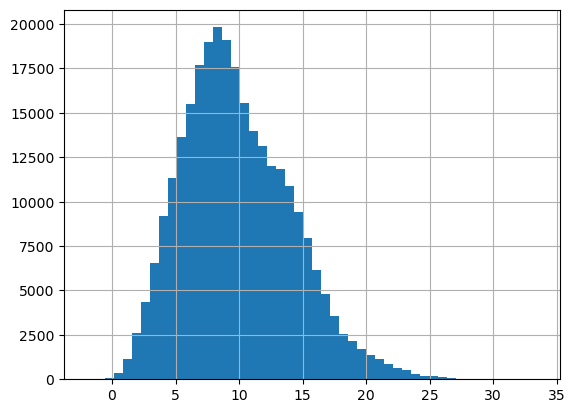

In [30]:
pm25_pred = est.predict(X)
pm25_pred.hist(bins=50)

## Linear Model: Using Avg Wind Alignment Cosine Squared

In [37]:
df_modeling_lr.columns

Index(['avg_wind_alignment_cosine_div2_pow2', 'total_population_male',
       'pm25_r12', 'month_07', 'month_11', 'pm25_slope12',
       'school_region_name', 'month',
       'school_region_name_northern_san_joaquin_valley', 'pm25_r6',
       'population_10_14_female', 'school_region_name_superior_california',
       'avg_wind_alignment_cosine_pow2', 'school_elevation_m',
       'pm25_last_month', 'population_0_4_male', 'month_02', 'pm25_lag_12mo',
       'school_temperature', 'school_wspd', 'total_population_female',
       'pm25_log', 'ps_temperature', 'avg_wind_alignment_cosine',
       'school_region_name_los_angeles_county', 'population_5_9_female',
       'month_01', 'avg_wind_alignment_cosine_pow4', 'population_0_4_female',
       'ps_elevation_m', 'year', 'point_source_pm25_tpy', 'month_12',
       'school_region_name_north_coast', 'population_15_19_male', 'month_09',
       'month_04', 'school_region_name_inland_empire',
       'school_region_name_orange_county', 'population_1

In [38]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [ ]:
x_all

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month_02',
 'month_03',
 'month_04',
 'month_05',
 'month_06',
 'month_07',
 'month_08',
 'month_09',
 'month_10',
 'month_11',
 'month_12',
 'school_region_name_central_coast',
 'school_region_name_inland_empire',
 'school_region_name_north_coast',
 'school_region_name_northern_san_joaquin_valley',
 'school_region_name_orange_county',
 'school_region_name_

In [39]:
independent_var = ['avg_wind_alignment_cosine_pow2']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [40]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:12:05   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [41]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745113426198977


<AxesSubplot: >

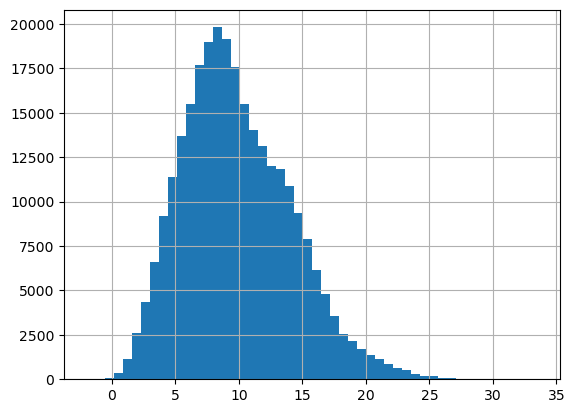

In [42]:
pm25_pred = est.predict(X)
pm25_pred.hist(bins=50)

## Linear Model: Using Avg Wind Alignment Cosine ^4

In [31]:
df_modeling_lr.columns

Index(['avg_wind_alignment_cosine_div2_pow2', 'total_population_male',
       'pm25_r12', 'month_07', 'month_11', 'pm25_slope12',
       'school_region_name', 'month',
       'school_region_name_northern_san_joaquin_valley', 'pm25_r6',
       'population_10_14_female', 'school_region_name_superior_california',
       'avg_wind_alignment_cosine_pow2', 'school_elevation_m',
       'pm25_last_month', 'population_0_4_male', 'month_02', 'pm25_lag_12mo',
       'school_temperature', 'school_wspd', 'total_population_female',
       'pm25_log', 'ps_temperature', 'avg_wind_alignment_cosine',
       'school_region_name_los_angeles_county', 'population_5_9_female',
       'month_01', 'avg_wind_alignment_cosine_pow4', 'population_0_4_female',
       'ps_elevation_m', 'year', 'point_source_pm25_tpy', 'month_12',
       'school_region_name_north_coast', 'population_15_19_male', 'month_09',
       'month_04', 'school_region_name_inland_empire',
       'school_region_name_orange_county', 'population_1

In [43]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [62]:
x_all

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19_male',
 'population_15_19_female',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month_02',
 'month_03',
 'month_04',
 'month_05',
 'month_06',
 'month_07',
 'month_08',
 'month_09',
 'month_10',
 'month_11',
 'month_12',
 'school_region_name_central_coast',
 'school_region_name_inland_empire',
 'school_region_name_north_coast',
 'school_region_name_northern_san_joaquin_valley',
 'school_region_name_orange_county',
 'school_region_name_

In [44]:
independent_var = ['avg_wind_alignment_cosine_pow4']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [45]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:19:47   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [35]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745052618451007


<AxesSubplot: >

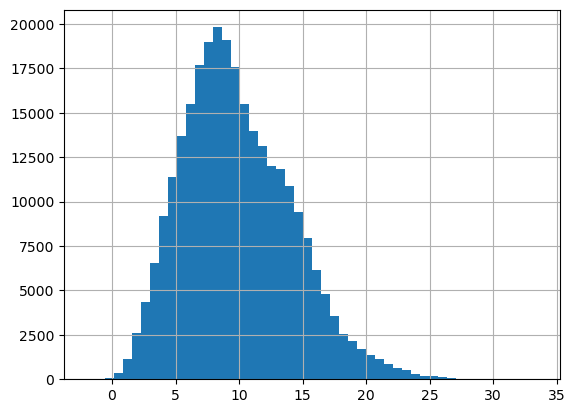

In [36]:
pm25_pred = est.predict(X)
pm25_pred.hist(bins=50)

## Linear Model: Using Avg Wind Alignment Cosine/2

Instrument: (Cos(theta)+1)/2

In [46]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [47]:
independent_var = ['avg_wind_alignment_cosine_div2']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [48]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:25:56   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [49]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

3.7745054786286483


## Linear Model: Using Avg Wind Alignment Cosine/2 ^2

Instrument: () (Cos(theta)+1)/2 )^2

In [50]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [51]:
independent_var = ['avg_wind_alignment_cosine_div2_pow2']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [52]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:28:36   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Linear Model: Using Avg Wind Alignment Cosine/2 ^4

Instrument: ( (Cos(theta)+1)/2 )^ 4

In [53]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4']

In [54]:
independent_var = ['avg_wind_alignment_cosine_div2_pow4']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [55]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:30:04   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Linear Model: Using Avg Wind Alignment Cosine/2 ^5

Instrument: ( (Cos(theta)+1)/2 )^ 5

In [68]:
instrument

['avg_wind_alignment',
 'avg_wind_alignment_cosine',
 'avg_wind_alignment_cosine_pow2',
 'avg_wind_alignment_cosine_pow4',
 'avg_wind_alignment_cosine_div2',
 'avg_wind_alignment_cosine_div2_pow2',
 'avg_wind_alignment_cosine_div2_pow4',
 'avg_wind_alignment_cosine_div2_pow5',
 'avg_wind_alignment_cosine_div2_pow6']

In [71]:
independent_var = ['avg_wind_alignment_cosine_div2_pow6']

X = df_modeling_lr[independent_var + x_all]
y = df_modeling_lr['pm25']

In [72]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7005.
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:53:31   Log-Likelihood:            -7.6654e+05
No. Observations:              279033   AIC:                         1.533e+06
Df Residuals:                  278980   BIC:                         1.534e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Decision Tree

In [73]:
from math import floor


dt = DecisionTreeRegressor(random_state=0)

distributions = dict(max_depth=list(range(8, 21)),
                        min_samples_split=uniform(loc=0.0001, scale=0.01),
                        min_samples_leaf= list( range( int(0.001*df_modeling_tree.shape[0]), int(0.01*df_modeling_tree.shape[0]) ) ),
                        max_features=[1, 'sqrt', 'log2'])

clf = RandomizedSearchCV(dt, distributions, random_state=0, refit=True, scoring='neg_root_mean_squared_error', n_jobs=-1, n_iter=100)

In [74]:
df_modeling_tree.columns

Index(['avg_wind_alignment_cosine_div2_pow2', 'total_population_male',
       'pm25_r12', 'pm25_slope12', 'school_region_name', 'month',
       'pop_under19_female', 'pm25_r6', 'population_10_14_female',
       'avg_wind_alignment_cosine_pow2', 'avg_wind_alignment_cosine_div2_pow5',
       'school_elevation_m', 'population_0_4_male', 'pm25_last_month',
       'pm25_lag_12mo', 'school_temperature', 'school_wspd',
       'total_population_female', 'avg_wind_alignment_cosine_div2_pow6',
       'ps_temperature', 'avg_wind_alignment_cosine', 'pm25_log',
       'school_region_name_los_angeles_county', 'population_15_19',
       'population_5_9_female', 'month_01', 'avg_wind_alignment_cosine_pow4',
       'population_0_4_female', 'ps_elevation_m', 'year',
       'point_source_pm25_tpy', 'population_15_19_male', 'population_5_9',
       'population_15_19_female', 'population_10_14', 'total_population',
       'total_pop_under19', 'nearby_point_source_count', 'ps_wspd_merge',
       'pop_under1

In [75]:
x_vars_for_tree_model

['school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19',
 'population_15_19_male',
 'population_15_19_female',
 'total_pop_under19',
 'pop_under19_male',
 'pop_under19_female',
 'total_population',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month',
 'school_region_name']

In [77]:
independent_var_cols = ['avg_wind_alignment']

x_vars = independent_var_cols + x_vars_for_tree_model

X = df_modeling_tree[x_vars]
y = df_modeling_tree['pm25']

In [79]:
x_vars

['avg_wind_alignment',
 'school_wspd',
 'ps_wspd_merge',
 'school_elevation_m',
 'ps_elevation_m',
 'population_0_4',
 'population_0_4_male',
 'population_0_4_female',
 'population_5_9',
 'population_5_9_male',
 'population_5_9_female',
 'population_10_14',
 'population_10_14_male',
 'population_10_14_female',
 'population_15_19',
 'population_15_19_male',
 'population_15_19_female',
 'total_pop_under19',
 'pop_under19_male',
 'pop_under19_female',
 'total_population',
 'total_population_male',
 'total_population_female',
 'ca_agi_per_returns',
 'school_temperature',
 'ps_temperature',
 'pm25_last_month',
 'pm25_r6',
 'pm25_r9',
 'pm25_r12',
 'pm25_r24',
 'pm25_slope6',
 'pm25_slope9',
 'pm25_slope12',
 'pm25_slope24',
 'pm25_lag_12mo',
 'nearby_point_source_count',
 'school_count',
 'point_source_pm25_tpy',
 'year',
 'month',
 'school_region_name']

In [80]:
df_modeling_tree.school_region_name.value_counts()

Los Angeles County             49941
San Francisco Bay Area         41723
Superior California            40607
Southern San Joaquin Valley    25228
Inland Empire                  24747
Northern San Joaquin Valley    22516
Central Coast                  20168
North Coast                    19922
San Diego - Imperial           19375
Orange County                  14806
Name: school_region_name, dtype: int64

In [78]:
search = clf.fit(X, y)

ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\tree\_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\pandas\core\generic.py", line 2069, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Inland Empire'

--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\tree\_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\anandadmin\anaconda3\envs\pyproj_env\lib\site-packages\pandas\core\generic.py", line 2069, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Los Angeles County'


In [ ]:
search.best_params_

In [ ]:
results = pd.DataFrame(search.cv_results_).sort_values('rank_test_score')
results.head(5)

In [ ]:
search.score(X, y)

In [ ]:
r2_val = r2_score(y, search.predict(X))
print(f"R^2 on training: {r2_val}")

In [ ]:
rms = mean_squared_error(y, search.predict(X), squared=False)
print(f"RMSE on training: {rms}")